This is formatting and aligning data from Copernicus EMS data: https://rapidmapping.emergency.copernicus.eu/

In [3]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import yaml
from rasterio.crs import CRS
import pandas as pd

In [57]:
yaml_file = '../events/chile_fire_2024.yml' #'porto_algre.yml'
with open(yaml_file) as f:
    event_dict = yaml.safe_load(f)["event"]
event_dict

{'event_name': 'tuscany_flood_2023',
 'bounds': [10.97631339, 43.81441325, 11.15319728, 43.98650075],
 'event_date': '2023-11-02',
 'pre_event_window_days': 100,
 'post_event_window_days': 60,
 'rtc_track_numbers': [15, 168],
 'mgrs_tiles': ['32TPP'],
 'dist_hls_confirmed_change_min_days': 30,
 'source_id': 'Copernicus EMSN185',
 'links': ['https://emergency.copernicus.eu/mapping/list-of-components/EMSN185',
  'https://earthobservatory.nasa.gov/images/152051/flooding-in-tuscany']}

In [52]:
df_event = gpd.read_file('../external_validation_data/copernicus_ems/chile_fire_2024/EMSR715_AOI01_DEL_PRODUCT_v2/EMSR715_AOI01_DEL_PRODUCT_observedEventA_v2.shp')
df_event.head()

,event_type,obj_desc,det_method,notation,dmg_src_id,area,geometry
0,8-Wildfire,Forest Fire,Semi-automatic extraction,Burnt area,2,0.147137,"POLYGON ((-71.50879 -33.19332, -71.50874 -33.1..."
1,8-Wildfire,Forest Fire,Semi-automatic extraction,Burnt area,2,0.123274,"POLYGON ((-71.49745 -33.19297, -71.49731 -33.1..."
2,8-Wildfire,Forest Fire,Semi-automatic extraction,Burnt area,2,0.494222,"POLYGON ((-71.49247 -33.19091, -71.49242 -33.1..."
3,8-Wildfire,Forest Fire,Semi-automatic extraction,Burnt area,2,1.407952,"POLYGON ((-71.49252 -33.18949, -71.49241 -33.1..."
4,8-Wildfire,Forest Fire,Semi-automatic extraction,Burnt area,2,0.041682,"POLYGON ((-71.49458 -33.18949, -71.49453 -33.1..."


<Axes: >

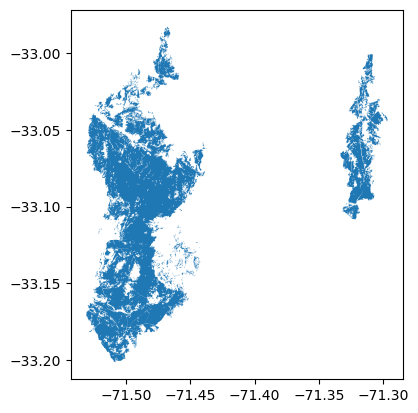

In [43]:
df_event.plot()

In [44]:
df_event.total_bounds

array([-71.53071089, -33.20143816, -71.2964628 , -32.98270579])

In [45]:
geo = df_event.geometry.unary_union

df_event_f = gpd.GeoDataFrame({'name': [event_dict['event_name']],
                               'date': [pd.to_datetime(event_dict['event_date'])],
                               'source_id': [f'Copernicus {event_dict["source_id"]}']},
                              geometry=[geo],
                              crs=CRS.from_epsg(4326))
df_event_f.head()

,name,date,source_id,geometry
0,chile_fire_2024,2024-02-04,Copernicus EMSR715,"MULTIPOLYGON (((-71.52897 -33.18187, -71.52898..."


In [46]:
EXTERNAL_VAL_DATA_DIR = Path('../external_validation_data_db/')
EXTERNAL_VAL_DATA_DIR.mkdir(exist_ok=True, parents=True)

In [47]:
df_event_f.to_file(EXTERNAL_VAL_DATA_DIR / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')

# Extent

In [53]:
df_aoi = gpd.read_file('../external_validation_data/copernicus_ems/chile_fire_2024/EMSR715_AOI01_DEL_PRODUCT_v2/EMSR715_AOI01_DEL_PRODUCT_areaOfInterestA_v2.shp')
df_aoi.head()

,emsr_id,glide_no,area_id,locality,map_type,geometry
0,EMSR715,WF-2024-000010-CHL,01,Valparaiso,Delineation,"POLYGON ((-71.17839 -32.85038, -71.14183 -33.2..."


<Axes: >

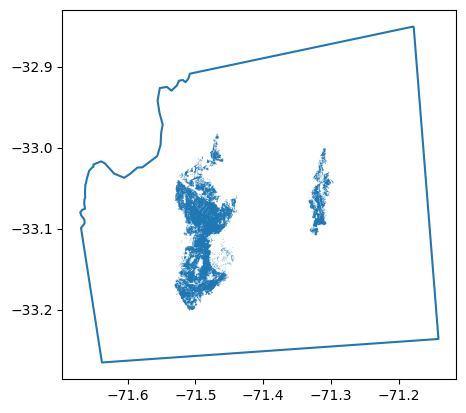

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df_aoi.boundary.plot(ax=ax)
df_event.plot(ax=ax)

In [55]:
EXTERNAL_VAL_EXTENTS = Path('../external_validation_data_extents_db/')
EXTERNAL_VAL_EXTENTS.mkdir(exist_ok=True, parents=True)

In [56]:
df_aoi.to_file(EXTERNAL_VAL_EXTENTS / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')